## Machine Learning

In [1]:
# Feature importance

import sys
sys.path.append("..")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
scores = pd.read_csv("../Data/internet/III_Fifth_Edition_Scores.csv")
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 78 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Country                                                             600 non-null    object 
 1   Edition                                                             600 non-null    object 
 2   OVERALL                                                             429 non-null    float64
 3   1) AVAILABILITY                                                     429 non-null    float64
 4   1.1) Usage                                                          429 non-null    float64
 5   1.1.1) Internet users                                               600 non-null    float64
 6   1.1.2) Fixed-line broadband subscribers                             600 non-null    float64
 7   1.1.3) Mobile sub

### Merge dataframes to line up Affordability and affordability data with independent variables like population

In [3]:
# df_ml = pd.merge(df_features, scores, on=['Country','Year'])
# df_ml

In [4]:
df_ml = scores.iloc[:, [3, 30, 40]]
df_ml.columns = [x.split(') ')[-1] for x in df_ml.columns]
df_ml = df_ml.dropna()
df_ml

,AVAILABILITY,AFFORDABILITY,RELEVANCE
1,50.9,61.6,30.3
2,53.5,62.2,38.9
3,57.2,61.6,58.1
4,58.0,61.3,56.3
6,28.6,58.8,44.3
...,...,...,...
592,36.0,56.6,37.9
593,37.5,57.6,49.1
594,37.5,58.8,59.1
598,43.2,38.9,54.0


### X, y split



### Retrieve Availability and Affordability

In [5]:
X = df_ml.iloc[:,0]
y = df_ml.iloc[:, 1]

### Import ML models and utils

In [6]:
# !pip install shap
# !pip install xgboost --user --upgrade pip
# !pip install graphviz
# import sys

# !{sys.executable} -m pip install graphviz

In [7]:
import shap

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score

import xgboost as xgb
from xgboost import XGBRegressor


### X = Availability, y = Affordability

In [8]:

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

# Init model
model = XGBRegressor(n_estimators=100)
# Fit model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R2: {r2}, MSE: {mse}")

R2: 0.48293688743475915, MSE: 131.08251881721563


In [9]:
y_pred

array([55.95894 , 57.568768, 55.95894 , 60.276936, 64.756546, 77.40674 ,
       66.74082 , 85.640175, 83.08781 , 95.77067 , 77.27921 , 31.449614,
       70.061584, 58.580975, 75.81524 , 54.89735 , 76.17791 , 56.942905,
       65.16083 , 86.66086 , 83.45046 , 52.347507, 56.942905, 65.41266 ,
       81.28902 , 70.356895, 69.49865 , 76.45799 , 71.6101  , 84.43824 ,
       77.27921 , 63.89717 , 83.76799 , 86.66086 , 35.463814, 84.43824 ,
       68.59201 , 86.27069 , 89.184555, 62.756622, 75.81524 , 76.78583 ,
       68.864365, 46.547497, 41.225693, 64.31161 , 87.26607 , 53.609093,
       64.31161 , 72.10351 , 81.73171 , 70.18365 , 76.8943  , 59.63813 ,
       90.91216 , 58.365856, 76.8943  , 51.251114, 66.97935 , 32.264736,
       76.58435 , 69.49865 , 53.99428 , 63.58625 , 71.791306, 52.78817 ,
       78.613075, 68.33389 , 31.449614, 83.45046 , 54.7489  , 65.64886 ,
       58.54597 , 78.03074 , 67.42329 , 85.93283 , 68.4874  , 75.54072 ,
       74.11621 , 79.66896 , 63.61879 , 87.60791 , 

In [10]:
y_pred_df = pd.DataFrame()
y_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

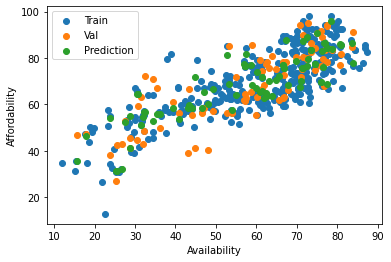

In [11]:
plt.scatter(X_train, y_train, label="Train")
plt.scatter(X_test, y_test, label="Val")
plt.scatter(X_test, y_pred, label="Prediction")
plt.legend()
plt.xlabel("Availability")
_ = plt.ylabel("Affordability")

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

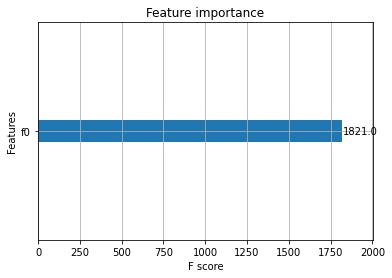

In [12]:
xgb.plot_importance(model)

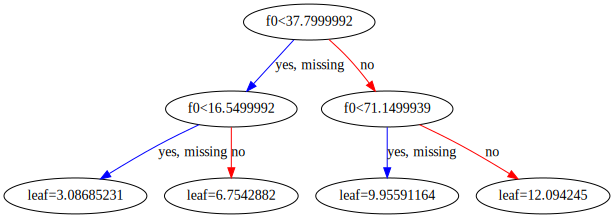

In [13]:
viz = xgb.to_graphviz(model, num_trees=2)
viz.render(filename='decision_tree.png')
viz

### Save model

In [14]:
model.save_model('model.bin')

### Load model

In [15]:
model = XGBRegressor(n_estimators=100)  # init model
model.load_model('model.bin')  # load data

### Predicting Relevance of the internet based on Affordability and Availability 

In [16]:
X = df_ml.iloc[:, :-1]
y = df_ml.iloc[:, -1]
X, y

(     AVAILABILITY  AFFORDABILITY
 1            50.9           61.6
 2            53.5           62.2
 3            57.2           61.6
 4            58.0           61.3
 6            28.6           58.8
 ..            ...            ...
 592          36.0           56.6
 593          37.5           57.6
 594          37.5           58.8
 598          43.2           38.9
 599          48.0           40.4
 
 [429 rows x 2 columns],
 1      30.3
 2      38.9
 3      58.1
 4      56.3
 6      44.3
        ... 
 592    37.9
 593    49.1
 594    59.1
 598    54.0
 599    49.9
 Name: RELEVANCE, Length: 429, dtype: float64)

In [17]:

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

# Init model
model = XGBRegressor(n_estimators=100)
# Fit model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R2: {r2}, MSE: {mse}")

R2: 0.6391263775014531, MSE: 108.99975664048193


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

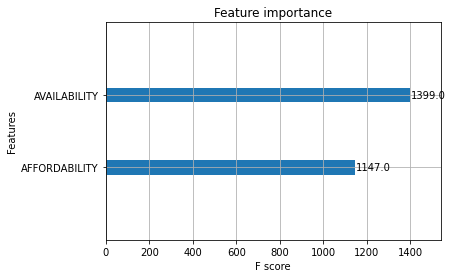

In [18]:
xgb.plot_importance(model)

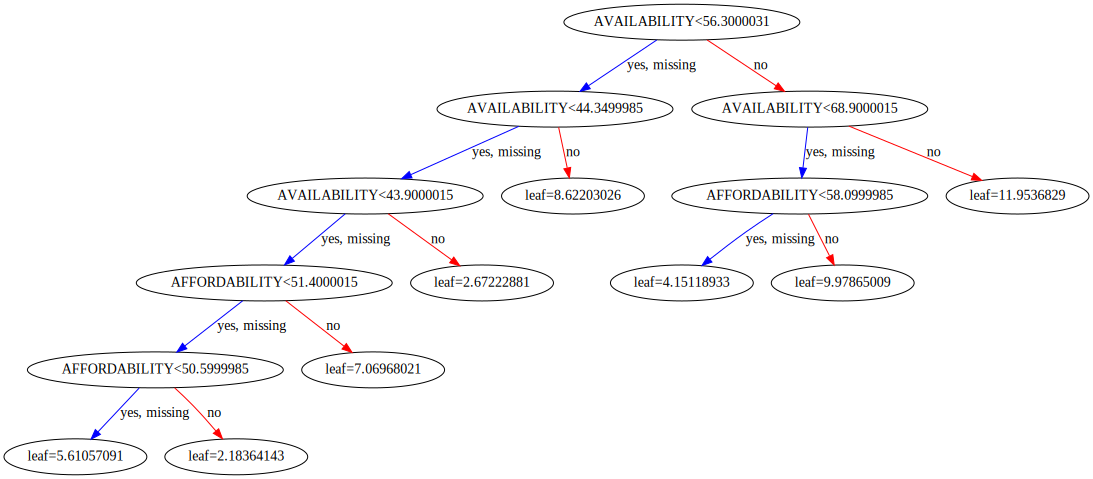

In [19]:
viz = xgb.to_graphviz(model, num_trees=2)
viz.render(filename='decision_tree')
viz

In [20]:
y_pred

array([49.814156, 61.548294, 42.9557  , 58.39063 , 49.673275, 55.09308 ,
       60.084274, 82.20431 , 85.332855, 86.22512 , 91.79991 , 38.829765,
       86.19405 , 53.044872, 83.4806  , 42.675003, 87.46987 , 46.867928,
       62.273743, 75.33617 , 80.73003 , 63.676617, 61.820053, 69.480225,
       56.294147, 82.46855 , 82.41202 , 84.09908 , 68.79269 , 80.85856 ,
       86.71601 , 51.83677 , 89.28949 , 78.497795, 38.039337, 77.46081 ,
       60.314014, 89.83574 , 69.495445, 59.509518, 87.87903 , 71.66425 ,
       86.26654 , 39.428265, 42.314537, 36.082172, 73.4946  , 47.23746 ,
       42.20187 , 69.20706 , 67.50236 , 75.176056, 76.26695 , 58.20442 ,
       88.58549 , 40.694466, 69.28306 , 47.87446 , 53.922714, 38.993423,
       54.448433, 91.19235 , 38.79655 , 66.19109 , 60.79904 , 61.594074,
       76.67199 , 56.43284 , 36.863567, 93.48776 , 44.179005, 61.761375,
       51.890133, 90.35649 , 74.13315 , 79.15248 , 75.55532 , 85.5177  ,
       72.21722 , 64.93439 , 60.57505 , 81.34672 , 

In [21]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_train["GROUP"] = "Training set"
y_train = pd.DataFrame(y_train, columns=["RELEVANCE"])

X_test["GROUP"] = "Test set"
y_test = pd.DataFrame(y_test, columns=["RELEVANCE"])
y_test["GROUP"] = "Test set"

y_pred = pd.DataFrame(y_pred, columns=["RELEVANCE"])
y_pred["GROUP"] = "Predicted Values"


In [22]:
y_train

,RELEVANCE
0,63.6
1,55.9
2,87.9
3,68.2
4,78.8
...,...
338,37.6
339,59.8
340,69.5
341,47.8


In [23]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test.drop(columns=["GROUP"]), y_test], axis=1)
predictions = pd.concat([X_test.drop(columns=["GROUP"]), y_pred], axis=1)

predictions

,AVAILABILITY,AFFORDABILITY,RELEVANCE,GROUP
0,35.4,67.2,49.814156,Predicted Values
1,53.9,56.4,61.548294,Predicted Values
2,36.2,50.0,42.955700,Predicted Values
3,48.0,40.4,58.390629,Predicted Values
4,62.4,77.3,49.673275,Predicted Values
...,...,...,...,...
81,67.3,78.4,81.346718,Predicted Values
82,57.1,64.3,67.589157,Predicted Values
83,71.5,80.3,76.609482,Predicted Values
84,43.2,38.9,55.138569,Predicted Values


In [24]:
train

,AVAILABILITY,AFFORDABILITY,GROUP,RELEVANCE
0,51.2,64.4,Training set,63.6
1,72.9,81.4,Training set,55.9
2,78.8,83.0,Training set,87.9
3,73.8,92.6,Training set,68.2
4,86.9,84.5,Training set,78.8
...,...,...,...,...
338,33.3,45.3,Training set,37.6
339,53.8,57.7,Training set,59.8
340,65.6,71.9,Training set,69.5
341,39.0,81.7,Training set,47.8


In [25]:
# df_viz = train.copy()
df_viz = test.copy()
# df_viz = df_viz.append(test, ignore_index=True)
df_viz = df_viz.append(predictions, ignore_index=True)


df_viz

,AVAILABILITY,AFFORDABILITY,RELEVANCE,GROUP
0,35.4,67.2,47.000000,Test set
1,53.9,56.4,39.800000,Test set
2,36.2,50.0,48.000000,Test set
3,48.0,40.4,49.900000,Test set
4,62.4,77.3,67.900000,Test set
...,...,...,...,...
167,67.3,78.4,81.346718,Predicted Values
168,57.1,64.3,67.589157,Predicted Values
169,71.5,80.3,76.609482,Predicted Values
170,43.2,38.9,55.138569,Predicted Values


In [26]:


affordability = alt.Chart(df_viz).mark_circle().encode(
    x='AFFORDABILITY',
    y='RELEVANCE',
    color='GROUP',
).interactive()

availability = alt.Chart(df_viz).mark_circle().encode(
    x='AVAILABILITY',
    y='RELEVANCE',
    color='GROUP',
).interactive()


(affordability + availability)

alt.LayerChart(...)

with a strong, affordable, available internet comes a better online community that generates relevant content for the country/culture

In [27]:
affordability | availability

alt.HConcatChart(...)

In [28]:
df_viz.to_csv("../Data/ml/prediction_dataset.csv", index=False)